<a href="https://colab.research.google.com/github/p0lsol/programming_basics/blob/main/5_nlp_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подготовка
В этом воркбуке мы познакомимся с библиотеками для обработки естественного языка и отработаем цикл FOR.

**HuggingFace Datasets**

HuggingFace - платформа для работы с моделями с архитектурой Transformer для обработки текстов и не только!

Datasets дает доступ к коллекциям данных и позволяет создавать свои наборы для машинного обучения.

`pip install` - команда shell для загрузки библиотеки

`-q` - параметр "quiet", не выводит не экран подробную информацию о процессе загрузки библиотеки

`!` - символ для объявления shell-команд

In [ ]:
!pip install -q datasets

Загрузим датасет для анализа тональности текстов

In [ ]:
from datasets import load_dataset

dataset = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")

Проведем анализ!

Структура объекта dataset довольно сложная, но удобная для интерпретации.

У нас есть 3 выборки: train, validation и test.

В каждой выборке 4 столбца:

- ID элемента датасета, он нужен, чтобы все значения были уникальными, как в реляционной БД
- text, label, sentiment

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

Обычно для обработки таких данных используется библиотека pandas, но пока мы учимся, будем использовать нативный метод - цикл FOR.

#**Задание 1**

Для начала проверим, сбалансирован ли наш датасет.

In [ ]:
# Какие метки есть в датасете?

# Создаем множество set()
# Множество - это список уникальных элементов
# Этот тип данных можно использовать как фильтр для наших меток
unique_labels = set()

# Для каждого уникального элемента из обучающей выборки dataset['train']
# Добавим элемент в множество unique_labels
for i in dataset['train']:
  unique_labels.add(i['sentiment'])

unique_labels

{'negative', 'neutral', 'positive'}

In [ ]:
# Теперь посчитаем, сколько представителей каждой метки в выборках train, validation и test
# Подсказки:
# - создайте пустые переменные, куда вы будете вносить количество меток
# - используйте цикл for и условия if
# - обновляйте значения переменных методом счетчика (каждое новое совпадение: counter += 1)
# - выведите на экран значения переменных для каждой из трех выборок

sentiment_counts = {
    'train': {'positive': 0, 'negative': 0, 'neutral': 0},
    'validation': {'positive': 0, 'negative': 0, 'neutral': 0},
    'test': {'positive': 0, 'negative': 0, 'neutral': 0}
}

for name, data in dataset.items():
  for i in data:
    if i['sentiment'] == 'positive':
      sentiment_counts[name]['positive'] += 1
    elif i['sentiment'] == 'negative':
      sentiment_counts[name]['negative'] += 1
    elif i['sentiment'] == 'neutral':
      sentiment_counts[name]['neutral'] += 1

for name, counts in sentiment_counts.items():
  print(f"{name}: {counts}")



train: {'positive': 10478, 'negative': 9105, 'neutral': 11649}
validation: {'positive': 1760, 'negative': 1517, 'neutral': 1928}
test: {'positive': 1730, 'negative': 1546, 'neutral': 1930}


In [ ]:
# Используйте арифметические операции, чтобы посчитать процентное соотношение или долю каждого класса в каждой выборке

for name, counts in sentiment_counts.items():
  total = sum(counts.values())
  for label, count in counts.items():
    percentage = (count / total) * 100
    print(f"{name} {label}: {percentage:.2f}%")

train positive: 33.55%
train negative: 29.15%
train neutral: 37.30%
validation positive: 33.81%
validation negative: 29.15%
validation neutral: 37.04%
test positive: 33.23%
test negative: 29.70%
test neutral: 37.07%


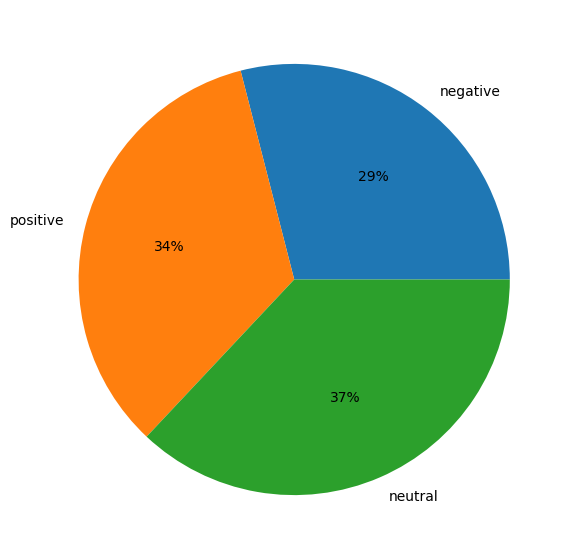

In [ ]:
# Создадим визуализацию
# Будем работать с библиотекой matplotlip
# Numpy - библиотека для обработки массивов данных - обеспечивает работу matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Задаем список меток
labels = 'negative', 'positive', 'neutral'
# Задаем значения для каждой метки, процентное соотношение (только для обучающей выборки)
data = 29, 34, 37

# Код для отрисовки круговой диаграммы
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%') # autopict создает числовые подписи и использует целочисленное форматирование

# Показать график
plt.show()

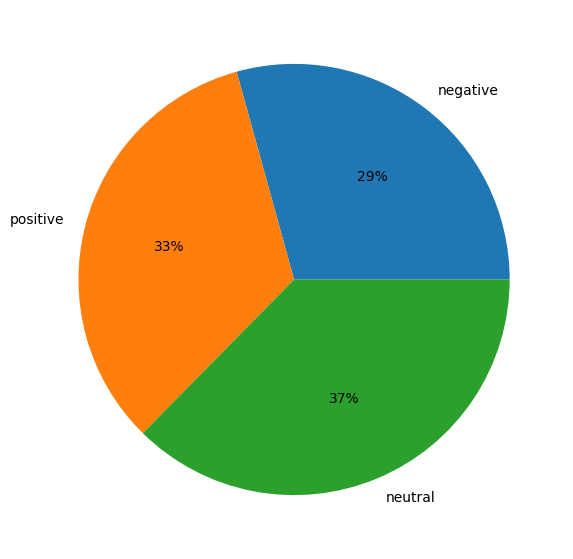

In [ ]:
# Сделаем то же самое для проверочной выборки
labels = 'negative', 'positive', 'neutral'
data = 29, 33, 37

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')
plt.show()

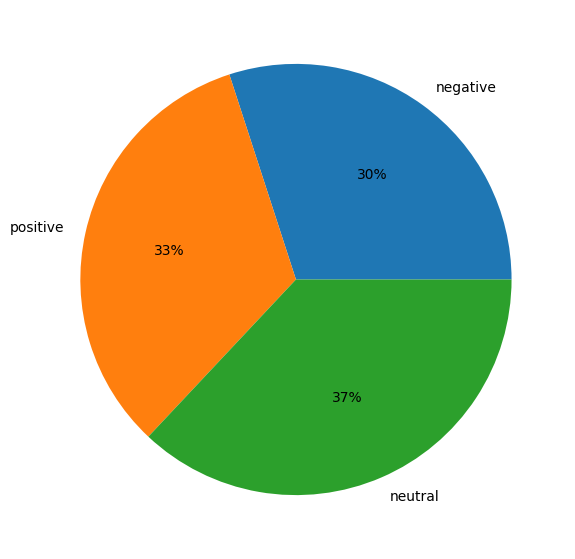

In [ ]:
# Сделаем то же самое для тестовой выборки
labels = 'negative', 'positive', 'neutral'
data = 30, 33, 37

fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=labels, autopct='%1.f%%')
plt.show()

#**Задание 2**

Займемся обработкой естественного языка.

Познакомимся с библиотекой SpaCy для обработки текстов.

In [49]:
# Загрузка spaCy
import spacy

# Загрузка библиотеки для визуализации spaCy
from spacy import displacy

# Инициализация инструментов SpaCy для английского (для каждого языка загружается свой вариант)
nlp = spacy.load('en_core_web_sm')

# Выведем доступные инструменты
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Токенизация SpaCy производится с помощью цикла for

In [50]:
# Образец текста из нашего датасета
sample = dataset['train'][0]['text']
sample

'Cooking microwave pizzas, yummy'

In [ ]:
# Для работы со SpaCy, _нужно_ привести все к нужному виду
# Для этого загружаем в nlp наш текст
doc = nlp(sample)
doc # Визуально ничего не изменилось, но теперь это объект класса SpaCy, который можно обработать инструментами NLP

Cooking microwave pizzas, yummy

In [ ]:
# Токенизация
for token in doc:
    print(token.text)

Cooking
microwave
pizzas
,
yummy


In [ ]:
# Частересная разметка
for token in doc:
    print(token.pos_)

NOUN
NOUN
NOUN
PUNCT
ADJ


In [ ]:
# Лемматизация
for token in doc:
    print(token.lemma_)

cooking
microwave
pizza
,
yummy


In [ ]:
# Синтаксическая роль (составляющие)
for token in doc:
    print(token.tag_)

NN
NN
NNS
,
JJ


In [ ]:
# Синтаксическая роль (зависимости)
for token in doc:

    print(token.dep_)

compound
compound
ROOT
punct
amod


In [ ]:
# Морфологическая разметка
for token in doc:
    print(token.morph)

Number=Sing
Number=Sing
Number=Plur
PunctType=Comm
Degree=Pos


Задание!

1. Сохраним в отдельную переменную список текстов из тестовой выборки

In [47]:
texts_test = dataset['test']['text']
print(texts_test[:5])
# Выведите первые 5 текстов

['getting cds ready for tour', ' MC, happy mother`s day to your mom ;).. love yah', 'A year from now is graduation....i am pretty sure i`m not ready for it!?!?!?', ' because you had chips and sale w/o me', 'Great for organising my work life balance']


2. Создадим список токенов для каждого текста с помощью SpaCy

In [55]:
for text in texts_test[:100]:
    doc = nlp(text)
    for token in doc:
        print(token.text)
# Не забудьте применить nlp!
# Выведите первые 5 текстов
# Обработка может занять много времени, достаточно обработать первые 100 текстов

getting
cds
ready
for
tour
 
MC
,
happy
mother`s
day
to
your
mom
;)
..
love
yah
A
year
from
now
is
graduation
....
i
am
pretty
sure
i`m
not
ready
for
it
!
?
!
?
!
?
 
because
you
had
chips
and
sale
w/o
me
Great
for
organising
my
work
life
balance
 
its
my
going
away
partyyy
 
`
s.
 
you
should
come
!
Is
Watching
Britains
Got
Talent
,
&
Is
biting
her
nails
.
Please
don`t
come
off
black
nail
varnish
 
remember
the
guy
who
1st
#
tweetbud
you
!
~
>
_
2890
 
help
him
get
900
flwrs
&
make
him
smile
!
 
She
!
Maybe
that
was
our
first
mistake
.
 
Not
everyone
is
as
cool
as
  
(
brown
nose
moment
)
today
i
was
so
happy
got
i
got
off
school
early
,
but
now
i`m
bored
!
!
 
but
but
it
was
funny
when
I
wrote
it
 
I
saw
an
all
red
Audi
on
the
highway
.
I
sped
uo
to
it
hoping
it
was
you
.
My
loss
I
loved
this
app
.
Worked
so
great
I
purchased
it
.
Now
it
has
logged
me
out
and
says
I
do
n't
exist
.
	
REALLY
?
?
oh
..
sorry
y
all
 
lol
 
i`m
totally
gon
na
have
money
to
actually
buy
a
pair
of
shoes
thi

3. Частеречная разметка: создаем список частей речи для каждого токена

In [59]:
for text in texts_test[:100]:
    doc = nlp(text)
    for token in doc:
      print(token.pos_)

VERB
NOUN
ADJ
ADP
NOUN
SPACE
PROPN
PUNCT
ADJ
PROPN
NOUN
ADP
PRON
NOUN
PUNCT
PUNCT
NOUN
NOUN
DET
NOUN
ADP
ADV
AUX
NOUN
PUNCT
PRON
AUX
ADV
ADJ
PROPN
PART
ADJ
ADP
PRON
PUNCT
PUNCT
PUNCT
PUNCT
PUNCT
PUNCT
SPACE
SCONJ
PRON
VERB
NOUN
CCONJ
NOUN
ADP
PRON
ADJ
ADP
VERB
PRON
NOUN
NOUN
NOUN
SPACE
PRON
PRON
VERB
ADV
NOUN
SPACE
PUNCT
PROPN
SPACE
PRON
AUX
VERB
PUNCT
AUX
PROPN
PROPN
PROPN
NOUN
PUNCT
CCONJ
AUX
VERB
PRON
NOUN
PUNCT
INTJ
PROPN
VERB
ADP
ADJ
NOUN
NOUN
SPACE
VERB
DET
NOUN
PRON
VERB
X
VERB
PRON
PUNCT
PUNCT
X
PUNCT
NUM
SPACE
VERB
PRON
VERB
NUM
NOUN
CCONJ
VERB
PRON
VERB
PUNCT
SPACE
PRON
PUNCT
ADV
PRON
AUX
PRON
ADJ
NOUN
PUNCT
SPACE
PART
PRON
AUX
ADV
ADJ
ADP
SPACE
PUNCT
ADJ
NOUN
NOUN
PUNCT
NOUN
PRON
AUX
ADV
ADJ
VERB
PRON
VERB
ADP
NOUN
ADV
PUNCT
CCONJ
ADV
PROPN
PROPN
PUNCT
PUNCT
SPACE
CCONJ
CCONJ
PRON
AUX
ADJ
SCONJ
PRON
VERB
PRON
SPACE
PRON
VERB
DET
DET
ADJ
PROPN
ADP
DET
NOUN
PUNCT
PRON
VERB
INTJ
ADP
PRON
VERB
PRON
AUX
PRON
PUNCT
PRON
NOUN
PRON
VERB
DET
NOUN
PUNCT
VERB
ADV
ADJ
PRON
VERB
PRON
PUN

4. Проверим точность разметки. С помощью range выведем для первых пяти текстов пары "слово - его частеречный тег".

In [85]:
# Это задание сложнее, чем кажется
# Подсказка:
# for i in range(len(list)) - это итерация по _длине_ списка;
# в переменную i сохраняется порядковый номер текущего элемента списка;
# если у нас есть несколько сопоставимых списков одинаковой длины,
# то на каждом шаге итерации мы можем выводить элементы одного порядка из разных списков,
# например for i in range(len(list)) поможет вывести tokens[4] и pos[4] одновременно, в одном блоке кода

for i in range(len(texts_test[:5])):
    doc = nlp(texts_test[i])
    for token in doc:
        print(token.text, ' ', token.pos_)

getting   VERB
cds   NOUN
ready   ADJ
for   ADP
tour   NOUN
    SPACE
MC   PROPN
,   PUNCT
happy   ADJ
mother`s   PROPN
day   NOUN
to   ADP
your   PRON
mom   NOUN
;)   PUNCT
..   PUNCT
love   NOUN
yah   NOUN
A   DET
year   NOUN
from   ADP
now   ADV
is   AUX
graduation   NOUN
....   PUNCT
i   PRON
am   AUX
pretty   ADV
sure   ADJ
i`m   PROPN
not   PART
ready   ADJ
for   ADP
it   PRON
!   PUNCT
?   PUNCT
!   PUNCT
?   PUNCT
!   PUNCT
?   PUNCT
    SPACE
because   SCONJ
you   PRON
had   VERB
chips   NOUN
and   CCONJ
sale   NOUN
w/o   ADP
me   PRON
Great   ADJ
for   ADP
organising   VERB
my   PRON
work   NOUN
life   NOUN
balance   NOUN


5. Разметка именованных сущностей

Вернемся к списку токенов, который мы создали в пункте 2. Выберем небольшой срез, например тексты 7-19.

In [94]:
for text in texts_test[7:19]: # Для каждого текста из выбранного среза: допишите этот код
  text = nlp(text) # Применим к тексту nlp: допишите этот код
  print([(ent, ent.label_) for ent in text.ents]) # Выведем именованную сущность и ее лейбл

[(1st, 'ORDINAL'), (2890, 'CARDINAL')]
[(first, 'ORDINAL')]
[(today, 'DATE'), (i`m, 'NORP')]
[]
[(Audi, 'ORG')]
[]
[(REALLY, 'GPE')]
[(i`m, 'NORP')]
[]
[]
[(TY, 'ORG')]
[(recent years, 'DATE')]


Здесь мы используем новый тип данных - кортеж `(entity, label)`

Кортеж очень похож на список. Разница только в том, что кортеж - неизменяемый, т.е. это список, в котором ничего нельзя изменить, удалить или добавить.

Кортежи занимают меньше памяти, т.к. у них меньше свойств. Они защищают данные от изменений и могут применяться в сложных структурах, например, служить ключом для словаря `dict`.

На практике, их удобно применять для разметки данных  методами NLP.

In [98]:
# Выберите любой текст и визуализируйте его разметку именованных сущностей
displacy.render(nlp(texts_test[2]), style="ent", jupyter=True)